In [2]:
import pandas as pd
import re

In [3]:
data = pd.read_csv("fifa.csv")
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [4]:
data.shape

(18207, 89)

### Data Filtering

In [5]:
df_wage = pd.DataFrame(data,columns=["Name", "Wage", "Value"])

In [6]:
def remove_currency(txt):
    clean = str(txt).replace('£','').replace('$','').replace('€','')
    print(clean)
    return clean

# re.match(number_pattern, '42') # Returns Match object


def convert_k_and_m(txt):
    txt = str(txt).lower()
    if 'm' in txt:
        return int(txt.replace('m','').replace(".",'')) * 1000000
    if 'k' in txt:
        return int(txt.replace('k','').replace(".",'')) * 1000
    return int(txt.replace(".",''))

# Regex Solution
wage = df_wage['Wage'].replace('[\€,]','', regex=True).apply(convert_k_and_m)
value =  df_wage['Value'].replace('[\€,]','', regex=True).apply(convert_k_and_m)

In [7]:
# df_cheks = df_wage['Wage'].apply(remove_currency)
df_wage.head()

,Name,Wage,Value
0,L. Messi,€565K,€110.5M
1,Cristiano Ronaldo,€405K,€77M
2,Neymar Jr,€290K,€118.5M
3,De Gea,€260K,€72M
4,K. De Bruyne,€355K,€102M


In [8]:
df_wage ['Wage'] = wage
df_wage['Value'] = value

In [9]:
df_wage.head()
    

,Name,Wage,Value
0,L. Messi,565000,1105000000
1,Cristiano Ronaldo,405000,77000000
2,Neymar Jr,290000,1185000000
3,De Gea,260000,72000000
4,K. De Bruyne,355000,102000000


In [10]:
df_wage['difference'] = df_wage['Value'] - df_wage['Wage']

In [11]:
df_wage.sort_values('difference', ascending=False)

,Name,Wage,Value,difference
2,Neymar Jr,290000,1185000000,1184710000
0,L. Messi,565000,1105000000,1104435000
16,H. Kane,205000,835000000,834795000
11,T. Kroos,355000,765000000,764645000
31,C. Eriksen,205000,735000000,734795000
...,...,...,...,...
12453,W. Díaz,1000,0,-1000
12192,H. Sulaimani,3000,0,-3000
3550,S. Nakamura,4000,0,-4000
4228,B. Nivet,5000,0,-5000


In [12]:
import seaborn as sns

<AxesSubplot:xlabel='Wage', ylabel='Value'>

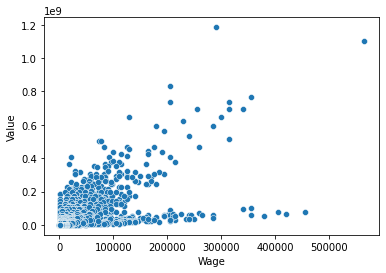

In [16]:
grp= sns.scatterplot(x='Wage', y='Value', data=df_wage)
grp

In [19]:
# !pip install bokeh
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

In [32]:
TOOLTIPS = HoverTool(
    tooltips=[
        ("index", "$index"),
        ("(Wage,Value)", "(@Wage, @Value)"),
        ("Name", "@Name")])


p = figure(title="FIFA Soccer 2019", 
           x_axis_label='Wages', 
           y_axis_label='Value',
          plot_width=700,
          plot_height=700,
          tools=[TOOLTIPS])



In [33]:
p.circle('Wage', 'Value', size=10, source=df_wage)

GlyphRenderer(id='1530', ...)

In [34]:
show(p)